In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Leer el archivo CSV
file_path = 'C:/Users/carlo/comprar_alquilar.csv'
data = pd.read_csv(file_path)

In [10]:
# Mostrar estadísticas descriptivas del conjunto de datos
print("Estadísticas descriptivas del conjunto de datos:")
print(data.describe())

# Mostrar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
print(data.head())

Estadísticas descriptivas del conjunto de datos:
          ingresos  gastos_comunes  pago_coche  gastos_otros       ahorros  \
count   202.000000      202.000000  202.000000    202.000000    202.000000   
mean   4958.995050      971.584158  211.742574    515.425743  38749.668317   
std    1682.862556      272.106351  124.940754    168.103075  17365.231870   
min    2008.000000      384.000000    0.000000    201.000000  10319.000000   
25%    3513.750000      766.750000   99.000000    383.250000  24964.250000   
50%    4947.500000      968.000000  208.500000    522.500000  38523.000000   
75%    6374.500000     1165.250000  318.750000    656.750000  52150.750000   
max    7984.000000     1585.000000  448.000000    828.000000  69934.000000   

            vivienda  estado_civil       hijos     trabajo     comprar  
count     202.000000    202.000000  202.000000  202.000000  202.000000  
mean   373349.638614      1.024752    1.232673    4.490099    0.331683  
std    136371.525622      0.8

In [11]:
# Separar características y variable objetivo
X = data.drop('comprar', axis=1)
y = data['comprar']

In [12]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [14]:
# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['comprar'] = y

In [15]:
# Mostrar estadísticas descriptivas de los datos PCA
print("\nEstadísticas descriptivas de los componentes principales:")
print(df_pca.describe())


Estadísticas descriptivas de los componentes principales:
                PC1           PC2     comprar
count  2.020000e+02  2.020000e+02  202.000000
mean  -7.035077e-17 -8.793846e-18    0.331683
std    1.644875e+00  1.451542e+00    0.471988
min   -3.613608e+00 -2.971579e+00    0.000000
25%   -1.136424e+00 -1.030045e+00    0.000000
50%    1.278548e-02  9.724160e-02    0.000000
75%    1.113297e+00  1.122459e+00    1.000000
max    3.589604e+00  3.043198e+00    1.000000


In [16]:
# Mostrar las primeras filas del DataFrame PCA
print("\nPrimeras filas del DataFrame PCA:")
print(df_pca.head())


Primeras filas del DataFrame PCA:
        PC1       PC2  comprar
0  1.321915 -0.222950        1
1  1.147878  1.716967        0
2  0.090369  1.836066        1
3  3.455898 -0.078279        0
4  0.916933 -1.184676        1


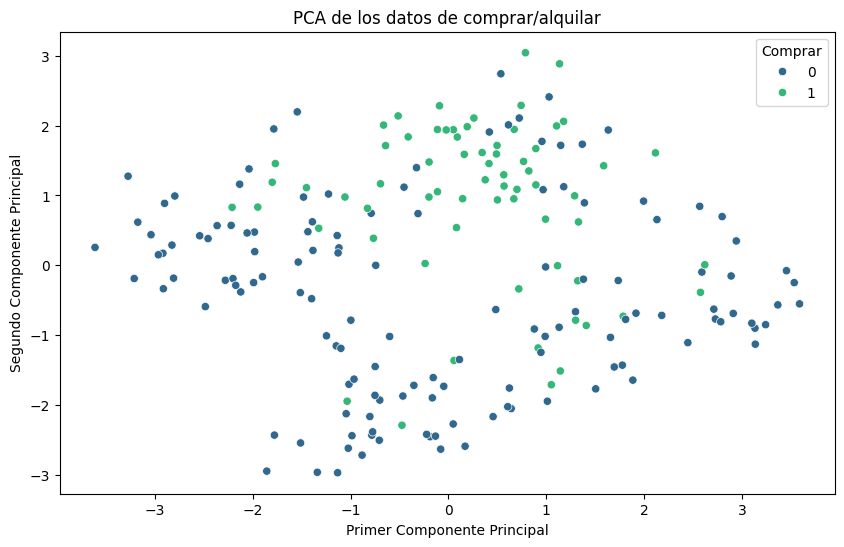

In [17]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='comprar', data=df_pca, palette='viridis')
plt.title('PCA de los datos de comprar/alquilar')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend(title='Comprar')
plt.show()